In [1]:
#Load libraries
import os
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

C:\Users\SHRAVYA\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Set working directory
os.chdir("C:/Users/SHRAVYA/Desktop/edwisor/project 3")

In [3]:
#Load data
bike_counting = pd.read_csv("day.csv")

In [4]:
#----------------------------------PRE PROCESSING-EXPLORATORY DATA ANALYSIS----------------------------------------------------#

In [5]:
#Exploratory Data Analysis

#converting to categorical variable#conver 

categorical_variable = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]

for i in categorical_variable:
    bike_counting[i] = bike_counting[i].astype("category")
bike_counting.dtypes

instant          int64
dteday          object
season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

In [6]:
#---------------------------------------MISSING VALUE ANALYSIS-----------------------------------------------------------------#

In [7]:

#Create dataframe with missing percentage
missing_val = pd.DataFrame(bike_counting.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(bike_counting))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

#save output results 
missing_val.to_csv("Miising_perc.csv", index = False)

missing_val
#AS we can see, no missing values present.Hence no missing values neccesary


,Variables,Missing_percentage
0,instant,0.0
1,dteday,0.0
2,season,0.0
3,yr,0.0
4,mnth,0.0
5,holiday,0.0
6,weekday,0.0
7,workingday,0.0
8,weathersit,0.0
9,temp,0.0


In [8]:
cnames =  ["instant", "temp", "hum", "windspeed", "casual", "registered","cnt"]

In [9]:
##Correlation analysis
#Correlation plot
df_corr = bike_counting.loc[:,cnames]
bike_counting

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [10]:
#----------------------------------------FEATURE SELECTION--------------------------------------------------------------------#

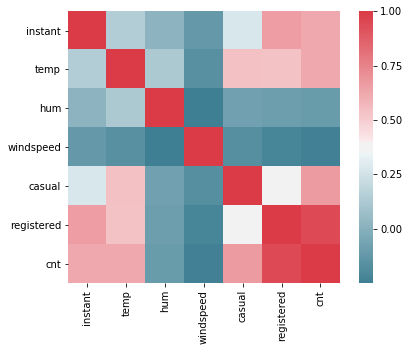

In [11]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.savefig('correlation.png')

In [12]:
#dimension reduction
#feature reduction
bike_counting = bike_counting.drop(['atemp','dteday'], axis=1)


In [13]:
#Chisquare test of independence
#Save categorical variables
cat_names = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]

In [14]:
#feature reduction

bike_counting.shape

(731, 14)

In [15]:
#----------------------------------------------FEATURE SCALING----------------------------------------------------------------#

In [16]:
#Nomalisation
#the variables casual,registered,and count are not much skwed but the other variables are highly skwed, hence we apply normalization
for i in cnames:
    print(i)
    bike_counting[i] = (bike_counting[i] - min(bike_counting[i]))/(max(bike_counting[i]) - min(bike_counting[i]))

instant
temp
hum
windspeed
casual
registered
cnt


In [17]:
#---------------------------------------------MODELLING-------------------------------------------------------------------------#

In [18]:
#Divide data into train and test
train, test = train_test_split(bike_counting, test_size=0.25, random_state=42)
bike_counting.shape

(731, 14)

In [19]:
# Decision Tree

In [20]:
#Decision tree for regression
fit_DT = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,0:13], train.iloc[:,13])

In [21]:
#Apply model on test data
predictions_DT = fit_DT.predict(test.iloc[:,0:13])

In [22]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
rmse(test.iloc[:,13], predictions_DT)
#rmse value=0.0832

0.08326961072062442

In [23]:
#Divide data into train and test
X = bike_counting.values[:, 0:13]
Y = bike_counting.values[:,13]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [24]:

#Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier


rf  =  RandomForestRegressor (random_state=12345)

In [25]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);



In [26]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

In [27]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [28]:
rmse(predictions, y_test)
#rmse value is 0.0119

0.011917680784755776

In [27]:
#linear regression model


In [28]:
fit = rpart(cnt~ ., data = X_train, method = "anova")

SyntaxError: invalid syntax (<ipython-input-28-9c242b60677a>, line 1)

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [113]:
# Split the data into training/testing sets
X_train = bike_counting[:-13]
X_test = bike_counting[-13:]
y_train = bike_counting.cnt[:-13]
y_test = bike_counting.cnt[-13:]

In [114]:
# Create linear regression object
regr = linear_model.LinearRegression()
 

In [115]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [116]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [117]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))


Coefficients: 
 [-5.52871026e-15 -1.38777878e-16  2.45636844e-15  3.12250226e-16
  4.29703202e-16  8.47303998e-17  3.18813884e-16  6.31005664e-17
 -2.69098979e-16  4.57641737e-16  7.97972799e-17  2.19205824e-01
  4.45486952e-01  4.40922236e-01]
Mean squared error: 0.00
Variance score: 1.00


In [119]:
rmse(y_pred, y_test)
#rmse value is 3.08

3.083111316345951e-16